## Training and Testing Set Generation

In [8]:
import numpy as np
import pandas as pd
import skimage
import matplotlib.pyplot as plt
import random
import os

In [1]:
# Outliers

In [39]:
# Empty directory
directory = 'Images/Testing_outlier'
for f in os.listdir(directory):
    os.remove(os.path.join(directory, f))

In [40]:
img_nr = ['001325']
size = 64

def inner_loop(image, size, c, nr):
    patches=[]
    for a in random.sample(range(c[2]-c[0]), 5):
        for b in random.sample(range(c[3]-c[1]), 5):
            corners = [c[0]+a-size//2, c[1]+b-size//2, c[0]+a+size//2, c[1]+b+size//2]
            if corners[0]>0 and corners[1]>0 and corners[2]<image.shape[0] and corners[3]<image.shape[1]:
                patch = image[corners[0]:corners[2], corners[1]:corners[3]]
                patches.append(patch)
                skimage.io.imsave('Images/Testing_outlier/{}_{}.png'.format(nr, len(patches)), patch)
    return patches

In [41]:
def extract_patches(nr):
    print(nr)
    img=skimage.io.imread('Images/Original/'+nr+'.png')
    df = pd.read_csv('csv/'+nr+'.csv', header=None, skiprows=6)
    print(df)
    coordinates = [df.iloc[0][1],df.iloc[0][0],df.iloc[0][1]+df.iloc[0][3],df.iloc[0][0]+df.iloc[0][2]] 
    return inner_loop(img, size, coordinates, nr)

for i in img_nr:
    patches = extract_patches(i)
    print('number of patches: ', len(patches))

001325
     0    1   2   3  4
0  345    2  66  76  0
1  486  456  25  20  0
number of patches:  15


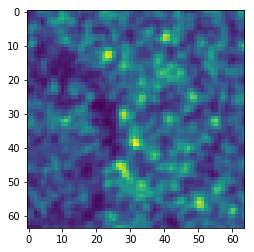

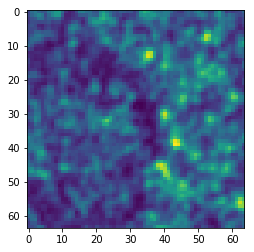

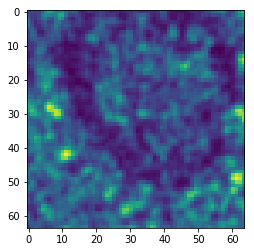

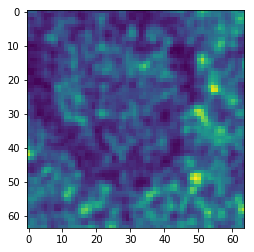

In [7]:
for i in range(4):
    plt.imshow(patches[i])
    plt.show()

In [42]:
# Training and Normal
# Empty directory
directory2 = 'Images/Training'
directory3 = 'Images/Testing_normal'

for directory in [directory2, directory3]:
    for f in os.listdir(directory):
        os.remove(os.path.join(directory, f))

In [43]:
skip = [1263, 1273, 1282, 1284, 1285, 1303, 1313, 1320, 1325]
img_nr = []
for i in range(1263, 1325):
    if i not in skip:
        img_nr.append('00%d' %i)
np.save("img_nr", img_nr)

In [44]:
size = 64

def inner_loop(image, nr, size, index):
    patches=[]
    for a in random.sample(range(image.shape[0]-65), 3):
        for b in random.sample(range(image.shape[1]-65), 3):
            patch = image[a:a+64, b:b+64]
            patches.append(patch)
            if index%2==0:
                skimage.io.imsave('Images/Training/{}_{}.png'.format(nr, len(patches)), patch)
            else:
                skimage.io.imsave('Images/Testing_normal/{}_{}.png'.format(nr, len(patches)), patch)
    return patches

In [45]:
def extract_patches(nr, index):
    img=skimage.io.imread('Images/Original/'+nr+'.png')
    return inner_loop(img, nr, size, index)

for index, i in enumerate(img_nr):
    patches = extract_patches(i, index)
    print('number of patches: ', len(patches))

number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of patches:  9
number of 